In [1]:
import os
import tensorflow as tf

In [2]:
path = 'C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/'

In [3]:
print(os.listdir(path))

['cats', 'dogs', 'horses', 'humans']


In [4]:
for i in os.listdir(path):
    print(i, len(os.listdir(path + i)))

cats 181
dogs 181
horses 181
humans 181


In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [6]:
img = image.load_img(path + 'dogs/dog.183.jpg')

In [7]:
import numpy as np
import keras

In [8]:
img = np.array(img)

In [9]:
img.shape

(190, 200, 3)

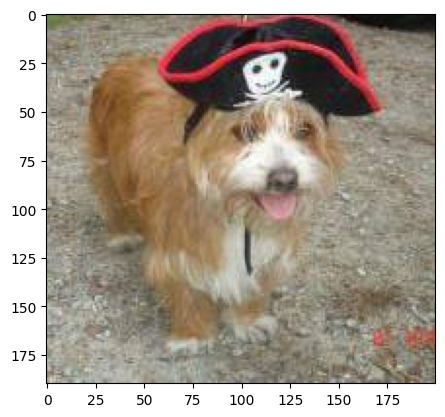

In [10]:
plt.imshow(img)

In [11]:
img_shape = (300, 300, 3)
model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(20, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(40, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(80, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(160, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(320, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Flatten(),
#     keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2  (None, 298, 298, 20)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 40)      7240      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 296, 296, 40)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 294, 294, 80)      28880     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 294, 294, 80)      0

In [13]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy', 'Recall', 'Precision'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_set = ImageDataGenerator(
                                rescale = 1/255,
                                rotation_range = 20,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                vertical_flip = True
)

In [16]:
train_gen = train_set.flow_from_directory(path, 
                                         target_size = (300, 300),
                                         batch_size = 50, 
                                         class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [17]:
X, Y = next(train_gen)

In [18]:
X.shape

(50, 300, 300, 3)

In [19]:
Y.shape

(50, 4)

[0. 0. 0. 1.]


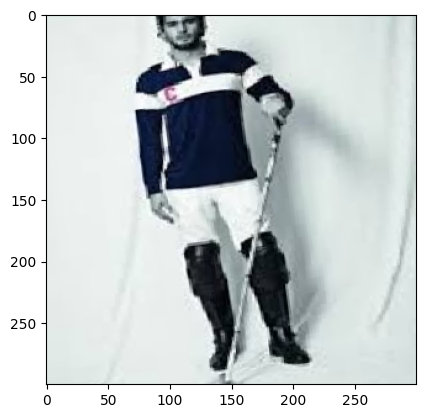

In [20]:
plt.imshow(X[0])
print(Y[0])

In [21]:
hist = model.fit_generator(train_gen, epochs = 100)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_5480\4282254850.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, epochs = 100)


Epoch 1/100


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/max_pooling2d_4/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\bhatt\AppData\Local\Temp\ipykernel_5480\4282254850.py", line 1, in <module>
      hist = model.fit_generator(train_gen, epochs = 100)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py", line 2810, in fit_generator
      return self.fit(
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py", line 1084, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\optimizers\optimizer.py", line 543, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\optimizers\optimizer.py", line 276, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential/max_pooling2d_4/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[24,290,290,320] and type int64 on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node gradient_tape/sequential/max_pooling2d_4/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1964]